In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('vgames2.csv')
df=df.iloc[:, 1:]
df.head()

pd.options.display.float_format = '{:.2f}'.format #소수점 둘째자리까지만 표현

df.duplicated(keep='first')
df.fillna("Unknown",inplace=True) 

df['NA_Sales']=df['NA_Sales'].replace({'K':'*0.0001','M':' '},regex=True).map(pd.eval).astype(float)
df['EU_Sales']=df['EU_Sales'].replace({'K':'*0.0001','M':' '},regex=True).map(pd.eval).astype(float)
df['JP_Sales']=df['JP_Sales'].replace({'K':'*0.0001','M':' '},regex=True).map(pd.eval).astype(float)
df['Other_Sales']=df['Other_Sales'].replace({'K':'*0.0001','M':' '},regex=True).map(pd.eval).astype(float)
df

df=df[df.Year!='Unknown'] #출시년도 unknown 삭제(데이터전처리limitation)
df['Year']=df['Year'].dropna()
df['Year']=df['Year'].apply(pd.to_numeric)

def years(x):
  if x <50:
    x=+2000
  if 50<=x<=99:
    x=+1900
  else:
    return x

df['Year']=df['Year'].apply(years)
df=df.sort_values('Year',ascending=True)
df=df.dropna()

df['Year']=df['Year'].astype(int)
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df

Saving vgames2.csv to vgames2 (3).csv


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12314,Ice Hockey,2600,1980,Unknown,Activision,0.46,0.03,0.00,0.01,0.50
9226,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
10121,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
13133,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
7317,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.23
...,...,...,...,...,...,...,...,...,...,...
10244,Rugby Challenge 3,PS4,2016,Sports,Alternative Software,0.00,0.03,0.00,0.01,0.04
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


      Genre  NA_Sales
0  Platform      0.51
1   Shooter      0.45
2    Sports      0.29
----------------------
      Genre  EU_Sales
0   Shooter      0.24
1  Platform      0.23
2    Racing      0.19
----------------------
          Genre  JP_Sales
0  Role-Playing      0.23
1      Platform      0.15
2      Fighting      0.10
--------------------------
      Genre  Other_Sales
0   Shooter         0.08
1    Racing         0.06
2  Platform         0.06
------------------------
          Genre  Total_Sales
0      Platform         0.94
1       Shooter         0.80
2  Role-Playing         0.61
------------------------


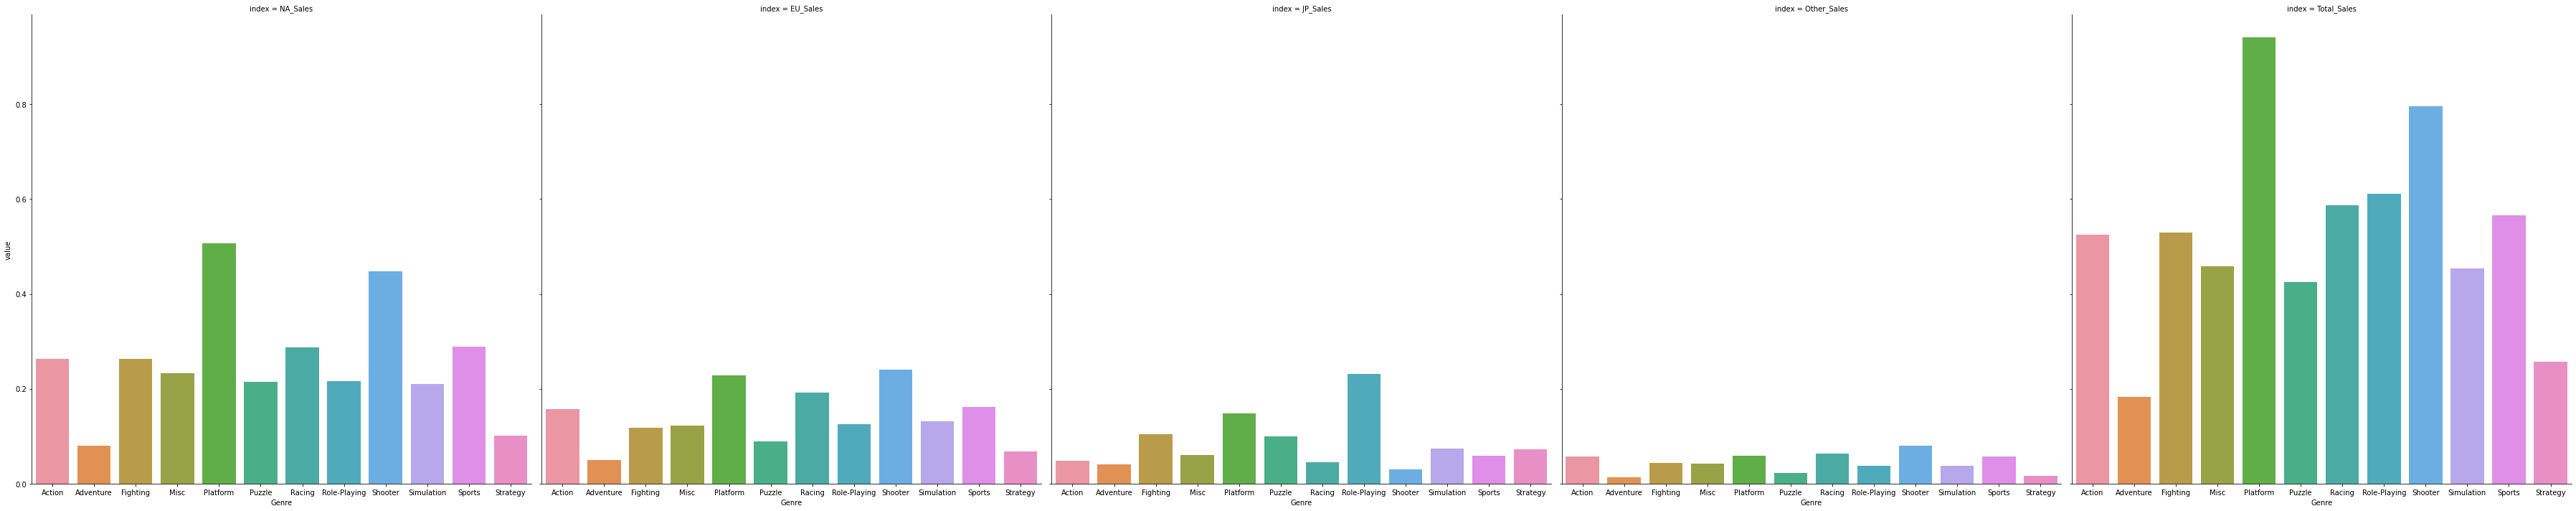

In [ ]:
#지역에 따라서 선호하는 게임 장르가 다를까 

df_1=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
group1=df_1.groupby('Genre').mean()
group1=pd.DataFrame(group1)
group1=group1.drop(['Unknown'])

na=pd.DataFrame(group1['NA_Sales'])
na=na.sort_values(by='NA_Sales',ascending=False)
na.reset_index(inplace=True)
print(na.head(3))
print('----------------------')

eu=pd.DataFrame(group1['EU_Sales'])
eu=eu.sort_values(by='EU_Sales',ascending=False)
eu.reset_index(inplace=True)
print(eu.head(3))
print('----------------------')

jp=pd.DataFrame(group1['JP_Sales'])
jp=jp.sort_values(by='JP_Sales',ascending=False)
jp.reset_index(inplace=True)
print(jp.head(3))
print('--------------------------')

other=pd.DataFrame(group1['Other_Sales'])
other=other.sort_values(by='Other_Sales',ascending=False)
other.reset_index(inplace=True)
print(other.head(3))
print('------------------------')

total=pd.DataFrame(group1['Total_Sales'])
total=total.sort_values(by='Total_Sales',ascending=False)
total.reset_index(inplace=True)
print(total.head(3))
print('------------------------')

group1=group1.T
group1.reset_index(inplace=True)
group1=group1.melt(id_vars='index',value_vars =group1.columns[1:])

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Genre',y='value',col='index',kind='bar',data=group1,height=10, aspect=1);
plt.show()


    Year         Genre  Total_Sales
0   1980        Action        11.35
1   1980     Adventure         4.78
2   1980      Fighting         4.53
3   1980          Misc         6.42
4   1980      Platform        32.50
5   1980        Puzzle        20.22
6   1980        Racing         7.35
7   1980  Role-Playing         7.13
8   1980       Shooter        20.17
9   1980    Simulation         0.51
10  1980        Sports        15.46


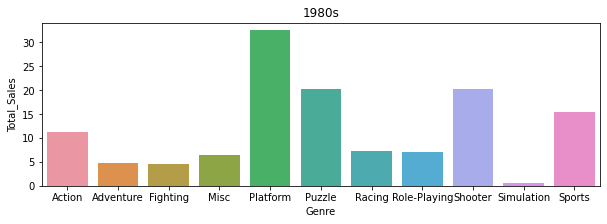

------------------------------------------------------------------------------------
    Year         Genre  Total_Sales
11  1990        Action        11.92
12  1990     Adventure         6.60
13  1990      Fighting         6.66
14  1990          Misc         5.67
15  1990      Platform        22.33
16  1990        Puzzle         8.13
17  1990        Racing        13.23
18  1990  Role-Playing        11.00
19  1990       Shooter         5.46
20  1990    Simulation         7.92
21  1990        Sports         4.87
22  1990      Strategy         3.78


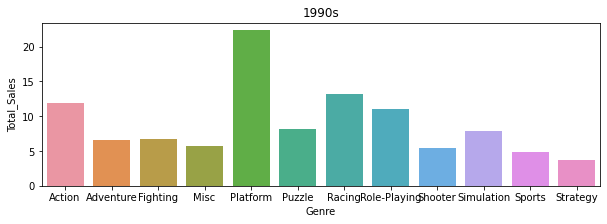

------------------------------------------------------------------------------------
    Year         Genre  Total_Sales
23  2000        Action         5.75
24  2000     Adventure         2.23
25  2000      Fighting         5.50
26  2000          Misc         4.87
27  2000      Platform         7.44
28  2000        Puzzle         3.38
29  2000        Racing         5.56
30  2000  Role-Playing         6.64
31  2000       Shooter         6.02
32  2000    Simulation         5.35
33  2000        Sports         5.72
34  2000      Strategy         2.40


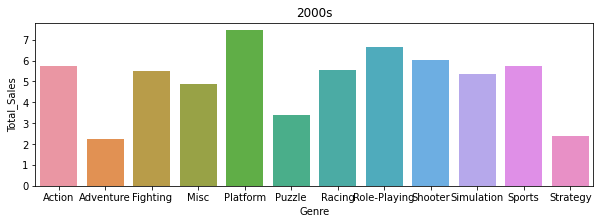

------------------------------------------------------------------------------------
    Year         Genre  Total_Sales
35  2010        Action         3.29
36  2010     Adventure         0.76
37  2010      Fighting         2.87
38  2010          Misc         2.92
39  2010      Platform         5.52
40  2010        Puzzle         1.17
41  2010        Racing         3.46
42  2010  Role-Playing         3.20
43  2010       Shooter         8.37
44  2010    Simulation         2.98
45  2010        Sports         4.18
46  2010      Strategy         1.25


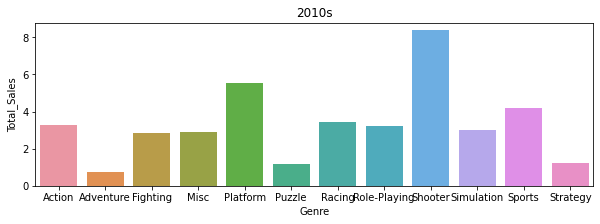

------------------------------------------------------------------------------------


In [156]:
#연도별로 출시된 게임의 트렌드가 있을까

import pandas as pd

df_2=df[['Year','Genre','Total_Sales']]
df_2=df_2.sort_values(by=["Year"],ascending=[True]) 
df_2

group2=df_2.groupby(['Genre','Year'])['Total_Sales'].mean()
group2=pd.DataFrame(group2)
group2=group2.drop(['Unknown'])
group2.reset_index(inplace=True)
group2

def decade(x):
  if 1980<=x<1990:
    return 1980
  if 1990<=x<2000:
    return 1990
  if 2000<=x<2010:
    return 2000
  else:
    return 2010

group2['Year']=group2['Year'].apply(decade)
group2

group3=group2.groupby(['Year','Genre'])['Total_Sales'].sum()
group3=pd.DataFrame(group3)
group3.reset_index(inplace=True)
group3

g_1980s=group3[group3['Year']==1980]
g_1990s=group3[group3['Year']==1990]
g_2000s=group3[group3['Year']==2000]
g_2010s=group3[group3['Year']==2010]

print(g_1980s)
plt.figure(figsize=(10,3))
bar_1980s=sns.barplot(x='Genre', y='Total_Sales', data=g_1980s).set_title('1980s')
plt.show(bar_1980s)
print('------------------------------------------------------------------------------------')

print(g_1990s)
plt.figure(figsize=(10,3))
bar_1980s=sns.barplot(x='Genre', y='Total_Sales', data=g_1990s).set_title('1990s')
plt.show(bar_1980s)
print('------------------------------------------------------------------------------------')

print(g_2000s)
plt.figure(figsize=(10,3))
bar_2000s=sns.barplot(x='Genre', y='Total_Sales', data=g_2000s).set_title('2000s')
plt.show(bar_2000s)
print('------------------------------------------------------------------------------------')

print(g_2010s)
plt.figure(figsize=(10,3))
bar_2010s=sns.barplot(x='Genre', y='Total_Sales', data=g_2010s).set_title('2010s')
plt.show(bar_2010s)
print('------------------------------------------------------------------------------------')


                            Name Platform  ...  Other_Sales Total_Sales
2908                  Wii Sports      Wii  ...         8.46       82.74
4199           Super Mario Bros.      NES  ...         0.77       40.24
12579             Mario Kart Wii      Wii  ...         3.31       35.83
3352           Wii Sports Resort      Wii  ...         2.96       33.00
7829    Pokemon Red/Pokemon Blue       GB  ...         1.00       31.38
1203                      Tetris       GB  ...         0.58       30.26
6937       New Super Mario Bros.       DS  ...         2.90       30.01
3014                    Wii Play      Wii  ...         2.85       29.01
16531  New Super Mario Bros. Wii      Wii  ...         2.26       28.61
10488                  Duck Hunt      NES  ...         0.47       28.31

[10 rows x 10 columns]


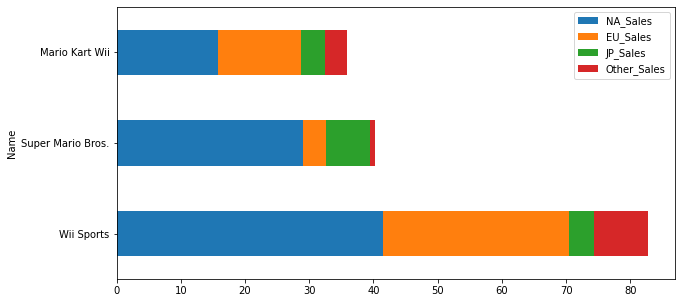

F_onewayResult(statistic=0.9678505136593755, pvalue=0.4161802476561245)

In [157]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

df_3= df.sort_values(by=["Total_Sales"],ascending=[False]) 
print(df_3.head(10))

#Top Sales 3게임
top3=pd.DataFrame([df.loc[2908],df.loc[4199],df.loc[12579]])
top3.reset_index(inplace=True)
top3.drop(columns=['index'],inplace=True)
top3

top_sales=top3[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
top_sales.set_index('Name',drop=True,inplace=True)
top_sales

top_salesbarh=top_sales.plot(kind="barh",stacked=True,figsize=(10,5))
plt.show(top_salesbarh)

from scipy.stats import f_oneway
wii=np.array([41.49,29.02,3.77,8.46])
mario=np.array([29.08,3.58,6.81,0.77])
kart=np.array([15.85,12.88,3.79,3.31])
f_oneway(wii, mario, kart)
